## Project Machine Learning - Loan Campaign
### Personal Loan - Advertising Model
- Class: UT ML/AC Certificate:
- Name: Daniel Levenstein
- Submission Date: 09/5/2025

## Problem Statement

### Context

AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

You as a Data scientist at AllLife bank have to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.

### Objective

To predict whether a liability customer will buy personal loans, to understand which customer attributes are most significant in driving purchases, and identify which segment of customers to target more.

### Data Dictionary
* `ID`: Customer ID
* `Age`: Customer’s age in completed years
* `Experience`: #years of professional experience
* `Income`: Annual income of the customer (in thousand dollars)
* `ZIP Code`: Home Address ZIP code.
* `Family`: the Family size of the customer
* `CCAvg`: Average spending on credit cards per month (in thousand dollars)
* `Education`: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* `Mortgage`: Value of house mortgage if any. (in thousand dollars)
* `Personal_Loan`: Did this customer accept the personal loan offered in the last campaign? (0: No, 1: Yes)
* `Securities_Account`: Does the customer have securities account with the bank? (0: No, 1: Yes)
* `CD_Account`: Does the customer have a certificate of deposit (CD) account with the bank? (0: No, 1: Yes)
* `Online`: Do customers use internet banking facilities? (0: No, 1: Yes)
* `CreditCard`: Does the customer use a credit card issued by any other Bank (excluding All life Bank)? (0: No, 1: Yes)

## Importing necessary libraries

In [199]:
from seaborn import countplot
# Installing the libraries with the specified version.
#!pip install wheel~=0.45.1 numpy~=2.3.2 pandas~=2.3.2 matplotlib~=3.10.5 seaborn~=0.13.1 scikit-learn~=1.7.1 sklearn-pandas~=2.2.0 -q
!pip install -r requirements.txt -q

**Note**:

1. After running the above cell, kindly restart the notebook kernel (for Jupyter Notebook) or runtime (for Google Colab), write the relevant code for the project from the next cell, and run all cells sequentially from the next cell.

2. On executing the above line of code, you might see a warning regarding package dependencies. This error message can be ignored as the above code ensures that all necessary libraries and their dependencies are maintained to successfully execute the code in this notebook.

In [200]:
# Import Project Dependencies
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import pandas as pd
from pandas import Series
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib.pyplot import annotate


import numpy as np


## Loading the dataset

In [201]:
# All the data in this dataset is numerical and no null values are present
df_raw = pd.read_csv("data/Loan_Modelling.csv")
df_raw.info()
df_copy = df_raw.copy()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


## Data Overview

# Observations

Data Summary:

- Numerical Data:
  - Mean Age is 45 years
  - Mean Experience is 20 years
  - Mean Income is 73 k
  - Mean Family size is 2
  - Mean Mortgage is 56 k



In [202]:
# Define Project Constants
data_dictionary_labels = ['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg', 'Education', 'Mortgage', 'Personal_Loan', 'Securities_Account', 'CD_Account', 'Online', 'CreditCard']
# Setting global RANDOM_STATE = 42
RANDOM_STATE = 42
numerical_fields = ['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage', 'ZIPCode']
categorical_fields = ['Family', 'Education', 'Personal_Loan', 'Securities_Account', 'CD_Account', 'Online', 'CreditCard']

df_categorical = df_raw[categorical_fields].copy()
df_numerical = df_raw[numerical_fields].copy()


# Sanity checks

In [203]:
# There is no duplicated data in this set
df_raw.duplicated().sum()

np.int64(0)

In [204]:
# There are no null values in the data set
df_raw.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64

## Exploratory Data Analysis.

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

#### Univariate Analysis

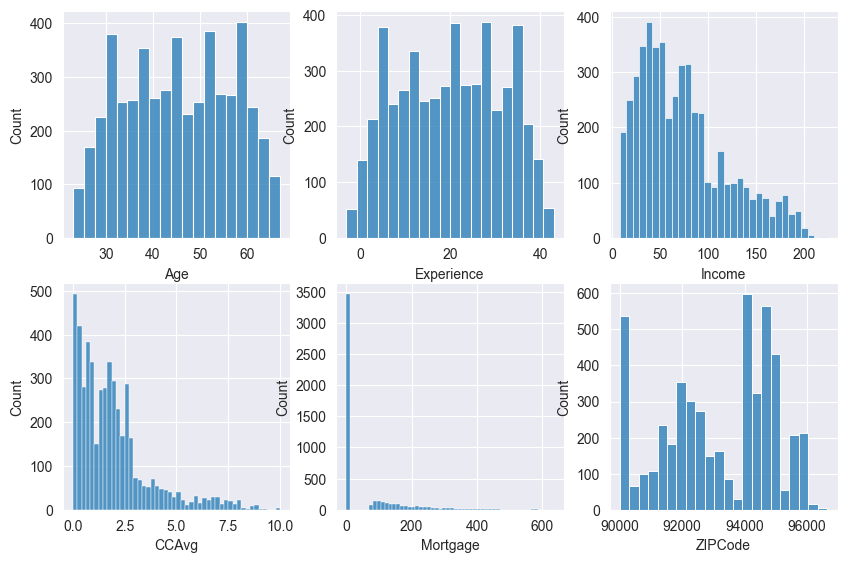

In [205]:
# Plotting Numerical Columns
plt.figure(figsize = (10,10))

for i, feature in enumerate(numerical_fields):
    plt.subplot(3, 3, i+1)
    sns.histplot(data=df_numerical, x=feature, kde=False)



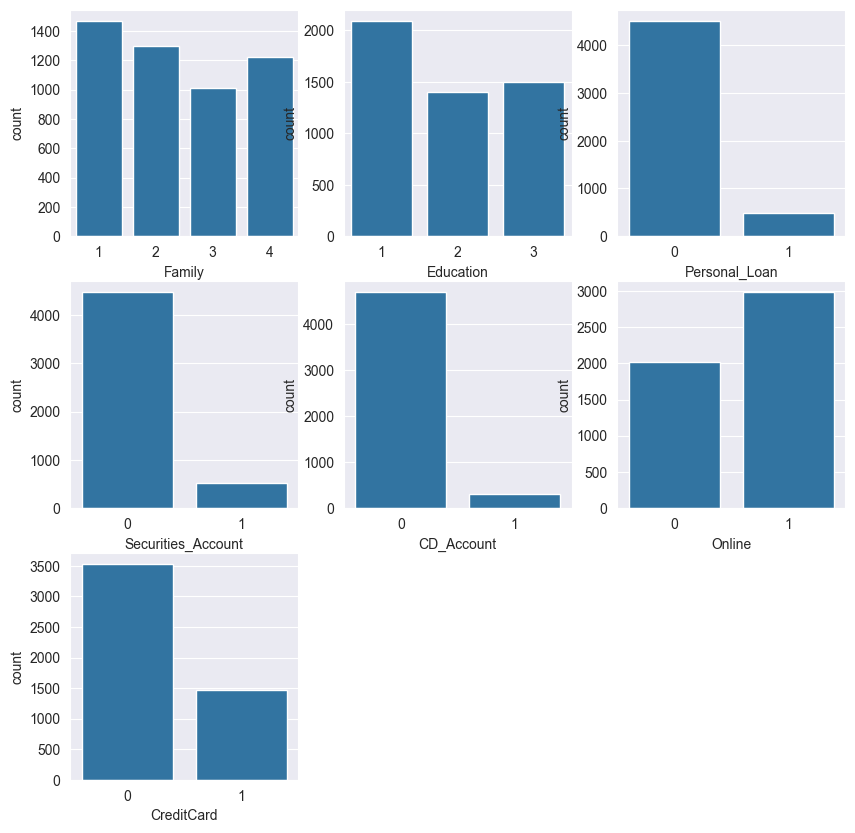

In [206]:
# Plotting of categorical values
plt.figure(figsize = (10,10))
for i, feature in enumerate(categorical_fields):
    plt.subplot(3, 3, i+1)
    sns.countplot(data=df_categorical, x=feature)


#### Bivariate analysis

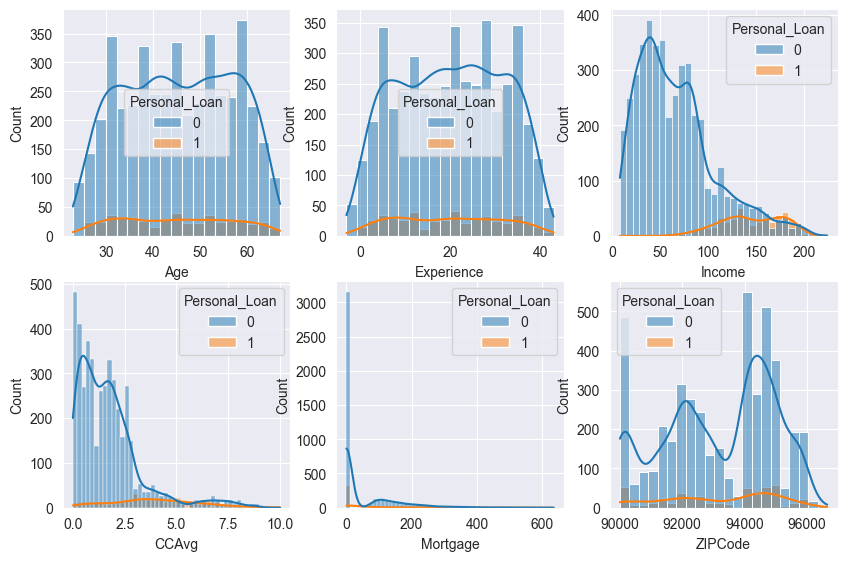

In [207]:
# Plotting Numerical Columns
plt.figure(figsize = (10,10))

for i, feature in enumerate(numerical_fields):
    plt.subplot(3, 3, i+1)
    sns.histplot(data=df_copy, x=feature, kde=True, hue='Personal_Loan')

#### Observations
- People who purchase personal loans have higher income relative to the general population.
- People with CCAvg below 2.5 k are less likely to purchase personal loans.

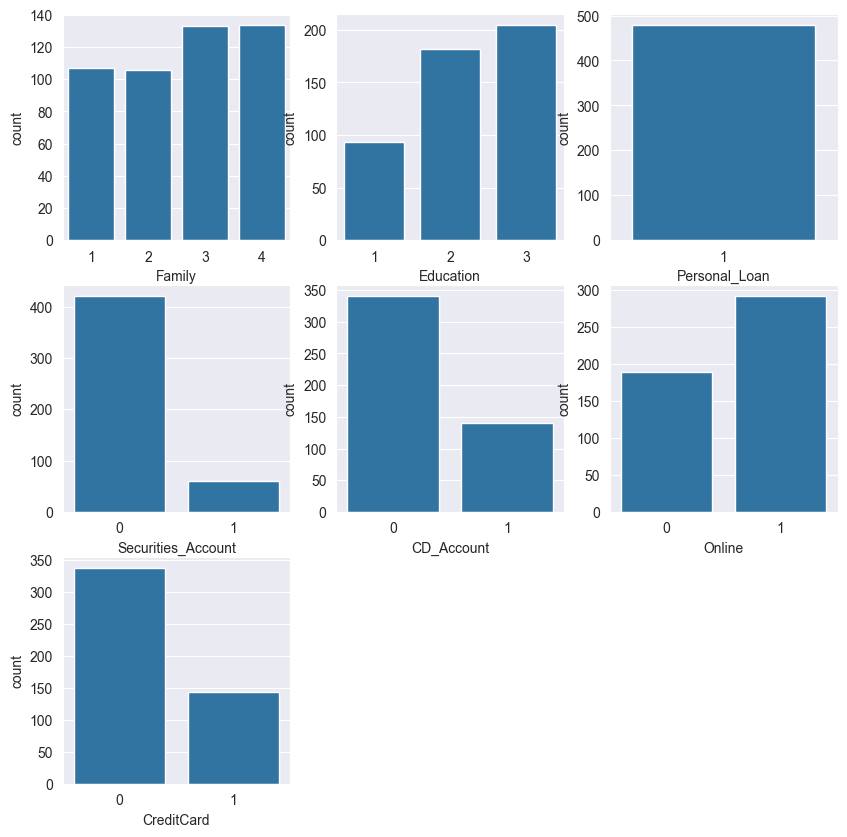

In [208]:
# Plotting of categorical values
plt.figure(figsize = (10,10))
for i, feature in enumerate(categorical_fields):
    plt.subplot(3, 3, i+1)
    sns.countplot(data=df_copy[df_copy.Personal_Loan==1], x=feature)

#### Observations
- There are a more people purchasing a loan who don't have Securities accounts with our bank than people who do.
- There are more people purchasing a loan who don't have CD account at our bank than those that do.
- There are more people purchasing a loan who don't have an existing credit card with another bank than those that do.
- A persons interest in purchasing a loan increases with education.

#### Additional Questions

**Questions**:

1. What is the distribution of mortgage attribute? Are there any noticeable patterns or outliers in the distribution?
2. How many customers have credit cards?
3. What are the attributes that have a strong correlation with the target attribute (personal loan)?
4. How does a customer's interest in purchasing a loan vary with their age?
5. How does a customer's interest in purchasing a loan vary with their education?

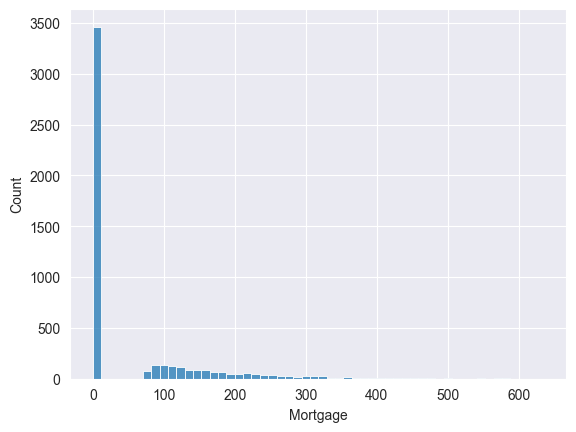

In [209]:
# Question 1: What is the distribution of mortgage attribute? Are there any noticeable patterns or outliers in the distribution?
sns.histplot(data=df_numerical, x='Mortgage');

The Mortgage attribute has a heavy left leaning distribution with almost 3500 individuals with a mortgage of $0

In [210]:
# Question 2: How many customers have credit cards?
df_copy['CreditCard'].value_counts()

CreditCard
0    3530
1    1470
Name: count, dtype: int64

3530 individuals in this dataset have credit cards.

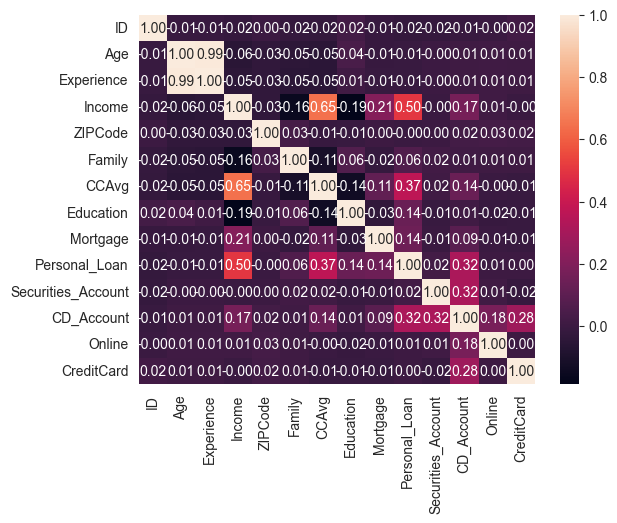

In [211]:
# Question 3: What are the attributes that have a strong correlation with the target attribute (personal loan)?
sns.heatmap(data=df_copy.corr(), annot=True, fmt='.2f');

The attributes with the highest correlation with loan approval appear to be income, CDAvg, and CD_Account.

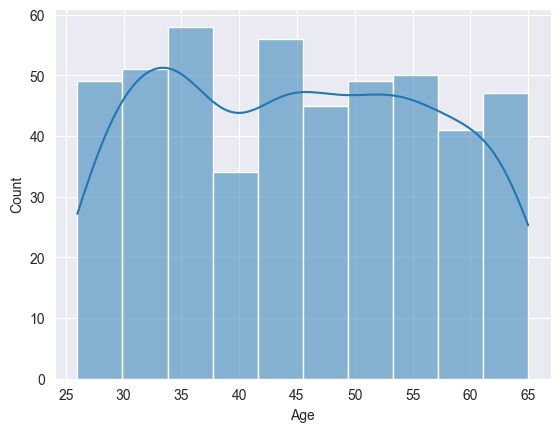

In [212]:
# Question 4: How does a customer's interest in purchasing a loan very with their age?
df_approved_loan = df_copy[df_copy['Personal_Loan'] == 1]
sns.histplot(data=df_approved_loan, x='Age', kde=True);


Customer interest in purchasing a loan appears to be relatively consistent across ages.

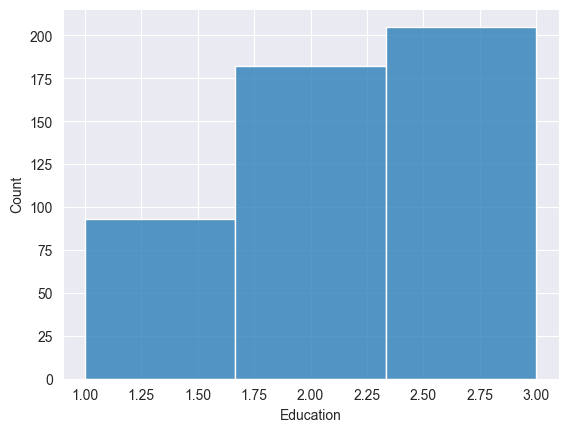

In [213]:
# Question 5: How does a customer's interest in purchasing a loan vary with their education?
df_approved_loan = df_copy[df_copy['Personal_Loan'] == 1]
sns.histplot(data=df_approved_loan, x='Education', bins=3);

A person's interest in purchasing a loan increases with education.

## Data Preprocessing

* Missing value treatment
* Feature engineering (if needed)
* Outlier detection and treatment (if needed)
* Preparing data for modeling
* Any other preprocessing steps (if needed)

#### Outlier Detection

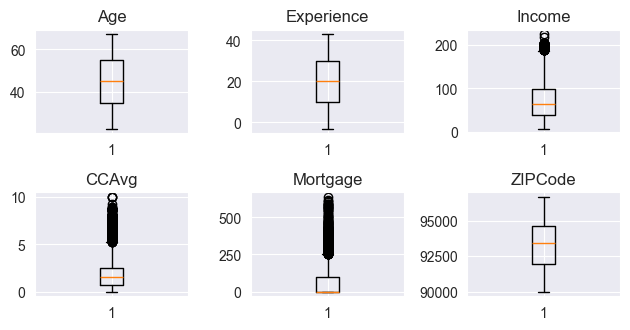

In [214]:
# Outlier Detection
for i, variable in enumerate(numerical_fields):
    plt.subplot(3, 3, i+1)
    plt.boxplot(df_numerical[variable])
    plt.tight_layout()
    plt.title(variable)

##### Observations
- The Income, CCAvg, and Mortgage column all have a large number out outliers.
- We are not going to treat them as they are valid values for this dataset.

#### Splitting training and testing data.

In [215]:
#### Splitting training and testing data.
# Training model off of both categorical_fields and numerical_fields
x_columns = categorical_fields + numerical_fields
# Moving Personal Loan field to y_column list
x_columns.remove('Personal_Loan')
y_columns = ['Personal_Loan']
x = df_copy[x_columns]
y = df_copy[y_columns]

print(x_columns)
print(y_columns)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = RANDOM_STATE);

['Family', 'Education', 'Securities_Account', 'CD_Account', 'Online', 'CreditCard', 'Age', 'Experience', 'Income', 'CCAvg', 'Mortgage', 'ZIPCode']
['Personal_Loan']


In [216]:

# Helper methods used in model building
def confusion_matrix_sklearn(model, predictors, target, plt_title, plot_index=1):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(4, 4))
    # The creation of subplots on this line isn't working correctly.
    # Instead of displaying the two plots side by side it's displaying them vertically.
    plt.subplot(2, 1, plot_index)
    plt.tight_layout()
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")
    plt.title(plt_title)

def display_train_and_test_confusion_matrix(model, predictors, target, test_predictors, test_target):
    confusion_matrix_sklearn(model, predictors, target,"Confusion Matrix Model", 1)
    confusion_matrix_sklearn(model, test_predictors, test_target,"Confusion Matrix Test",2)


# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_using_sklearn(model, predictors, target, test_predictors, test_target, scoring_method = precision_score, silent = True):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    if not silent:
        print("***** ",scoring_method.__name__+" *****")
    pred = model.predict(predictors)
    s_model = scoring_method(target, pred)
    if not silent:
        print("Model Score:", s_model)
    pred_test = model.predict(test_predictors)
    s_test = scoring_method(test_target, pred_test)
    if not silent:
        print("Test Score:", s_test)
    score_diff = abs(s_model - s_test)
    if not silent:
        print("** Score Difference:", score_diff)

    return abs(s_test - s_model)

# Rewriting model_performance_using_sklearn method as a method that returns a dataframe rather than a single value.

def model_performance_df(model, predictors, target, test_predictors, test_target):

    pred = model.predict(predictors)
    pred_test = model.predict(test_predictors)

    accuracy_train = accuracy_score(target, pred)
    accuracy_test = accuracy_score(test_target, pred_test)

    precision_train = precision_score(target, pred)
    precision_test = precision_score(test_target, pred_test)

    recall_train = recall_score(target, pred)
    recall_test = recall_score(test_target, pred_test)

    f1_train = f1_score(target, pred)
    f1_test = f1_score(test_target, pred_test)

    training_scores = pd.Series({'accuracy': accuracy_train, 'precision': precision_train, 'recall': recall_train, 'f1': f1_train})
    testing_scores = pd.Series({'accuracy': accuracy_test, 'precision' : precision_test, 'recall' : recall_test, 'f1': f1_test})
    percent_accuracy = abs(training_scores - testing_scores)

    df_stats = pd.DataFrame({
        'Training': training_scores,
        'Testing': testing_scores,
        'Delta': percent_accuracy,
    })
    return df_stats.T
def final_model_comparison(model1, model2, model3, x_test, y_test):
    pred1 = model1.predict(x_test)
    accuracy1 = accuracy_score(y_test, pred1)
    precision1 = precision_score(y_test, pred1)
    recall1 = recall_score(y_test, pred1)
    f1score1 = f1_score(y_test, pred1)

    pred2 = model2.predict(x_test)
    accuracy2 = accuracy_score(y_test, pred2)
    precision2 = precision_score(y_test, pred2)
    recall2 = recall_score(y_test, pred2)
    f1score2 = f1_score(y_test, pred2)

    pred3 = model3.predict(x_test)
    accuracy3 = accuracy_score(y_test, pred3)
    precision3 = precision_score(y_test, pred3)
    recall3 = recall_score(y_test, pred3)
    f1score3 = f1_score(y_test, pred3)

    df_model1 = pd.Series({'accuracy': accuracy1, 'precision': precision1, 'recall': recall1, 'f1score': f1score1})
    df_model2 = pd.Series({'accuracy': accuracy2, 'precision': precision2, 'recall': recall2, 'f1score': f1score2})
    df_model3 = pd.Series({'accuracy': accuracy3, 'precision': precision3, 'recall': recall3, 'f1score': f1score3})


    final_df = pd.DataFrame({
        'Model 1': df_model1,
        'Model 2': df_model2,
        'Model 3': df_model3
    })

    return final_df.T


def plot_decision_tree(model):
    plt.figure(figsize=(20, 10))

    out = tree.plot_tree(
        model,
        filled=True,
        fontsize=9,
        node_ids=False,
        class_names=None,
    )
    for o in out:
        arrow = o.arrow_patch
        if arrow is not None:
            arrow.set_edgecolor("black")
            arrow.set_linewidth(1)
    plt.show()

## Model Building

Shape of Training set: (4000, 12)
Shape of Test set: (1000, 12)


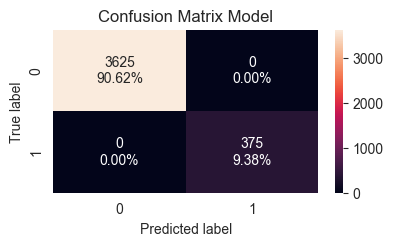

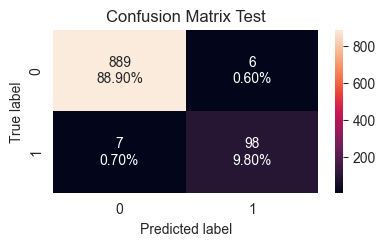

In [217]:

model0 = DecisionTreeClassifier(random_state=RANDOM_STATE)
model0.fit(x_train, y_train)
print("Shape of Training set:", x_train.shape)
print("Shape of Test set:", x_test.shape)
display_train_and_test_confusion_matrix(model0, x_train, y_train, x_test, y_test)


### Model Evaluation Criterion
* Because of the risks associated with making bad loans we are going to use precision as our evaluation criteria for our model.


In [218]:

# We are going to try to minimize the difference between model accuracy and model test score
print("Initial Model Score")
print("Evaluating model based on accuracy, precision and recall, and f1 score")

score0_df = model_performance_df(model0, x_train, y_train, x_test, y_test)
# Round all values in a data frame
(score0_df * 100).round(2)


Initial Model Score
Evaluating model based on accuracy, precision and recall, and f1 score


,accuracy,precision,recall,f1
Training,100.0,100.00,100.00,100.00
Testing,98.7,94.23,93.33,93.78
Delta,1.3,5.77,6.67,6.22


#### Observations
- Model score for the initial model is 100% on  all metrics
- Because of the risk of default on bad loans I am using the precision_score as my model scoring metric going forward.

### Model Building

In [219]:
model1 = DecisionTreeClassifier(random_state=RANDOM_STATE, min_samples_split=5)
model1.fit(x_train, y_train)
print("Creating a new model using min_samples_split=5 value for pruning")

score1_df = model_performance_df(model1, x_train, y_train, x_test, y_test)
(score1_df * 100).round(2)

Creating a new model using min_samples_split=5 value for pruning


,accuracy,precision,recall,f1
Training,99.8,99.73,98.13,98.92
Testing,98.6,95.05,91.43,93.20
Delta,1.2,4.68,6.70,5.72


#### Observations
- Model1 has a precision of 95% and an accuracy of 98.6%
- Adding the min_samples_split parameter reduced the variability in the mode while keeping the overall performance good.
- The hyper parameters for this model were chosen arbitrarily so there is likely more optimization that could be done.

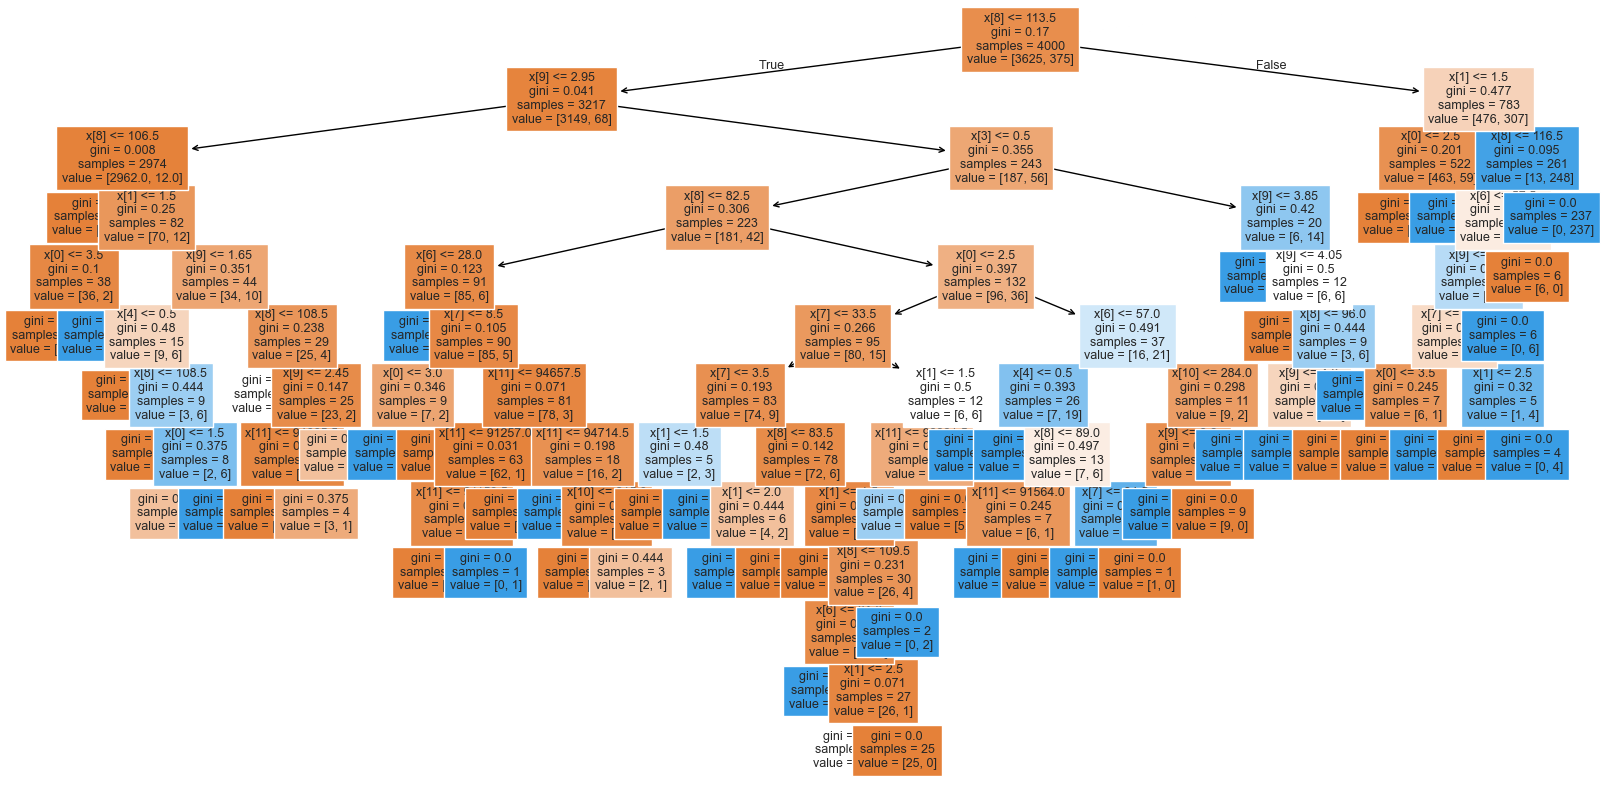

In [220]:
# Model1 Tree View
plot_decision_tree(model1)

## Model Performance Improvement

In [221]:
#### Optimizing for precision
print("Model2 optimizing for precision")
max_max_depth_values = 10
min_max_depth_values = 2
max_min_samples_split_values = 10
min_max_samples_split_values = 2
best_estimator = None
best_max_depth = None
best_min_samples_split = None
best_score_diff = float("inf")
model2 = None
for max_depth in range(min_max_depth_values, max_max_depth_values):
    for min_samples_split in range(min_max_samples_split_values, max_min_samples_split_values):
        estimator = DecisionTreeClassifier(
            max_depth = max_depth,
            min_samples_split = min_samples_split,
            class_weight = 'balanced',
            random_state = RANDOM_STATE,
        )
        estimator.fit(x_train, y_train)
        score = model_performance_using_sklearn(estimator, x_train, y_train, x_test, y_test, scoring_method = precision_score, silent=True)
        if score < best_score_diff:
            model2 = estimator
            best_score_diff = score
            best_max_depth = max_depth
            best_min_samples_split = min_samples_split


print("Best model depth:", best_max_depth)
print("Best model min sample split:", best_min_samples_split)

score2_df = model_performance_df(model2, x_train, y_train, x_test, y_test)
precision_loss = score1_df['precision']['Testing'] - score2_df['precision']['Testing']
accuracy_loss = score1_df['accuracy']['Testing'] - score2_df['accuracy']['Testing']

print(f"Precision Loss: {(precision_loss * 100).round(2)}%")
print(f"Accuracy Loss: {(accuracy_loss * 100).round(2)}%")
(score2_df * 100).round(2)

Model2 optimizing for precision
Best model depth: 8
Best model min sample split: 7
Precision Loss: 7.78%
Accuracy Loss: 0.9%


,accuracy,precision,recall,f1
Training,98.62,87.21,100.00,93.17
Testing,97.70,87.27,91.43,89.30
Delta,0.92,0.06,8.57,3.87


#### Observations
- Model2 has an accuracy of 97.7% and a precision of 87.2%.
- When optimizing for precision consistency my model precision value went down from 95% to 87%.
- Model2 has a testing recall value of 100% which sugests overfitting.

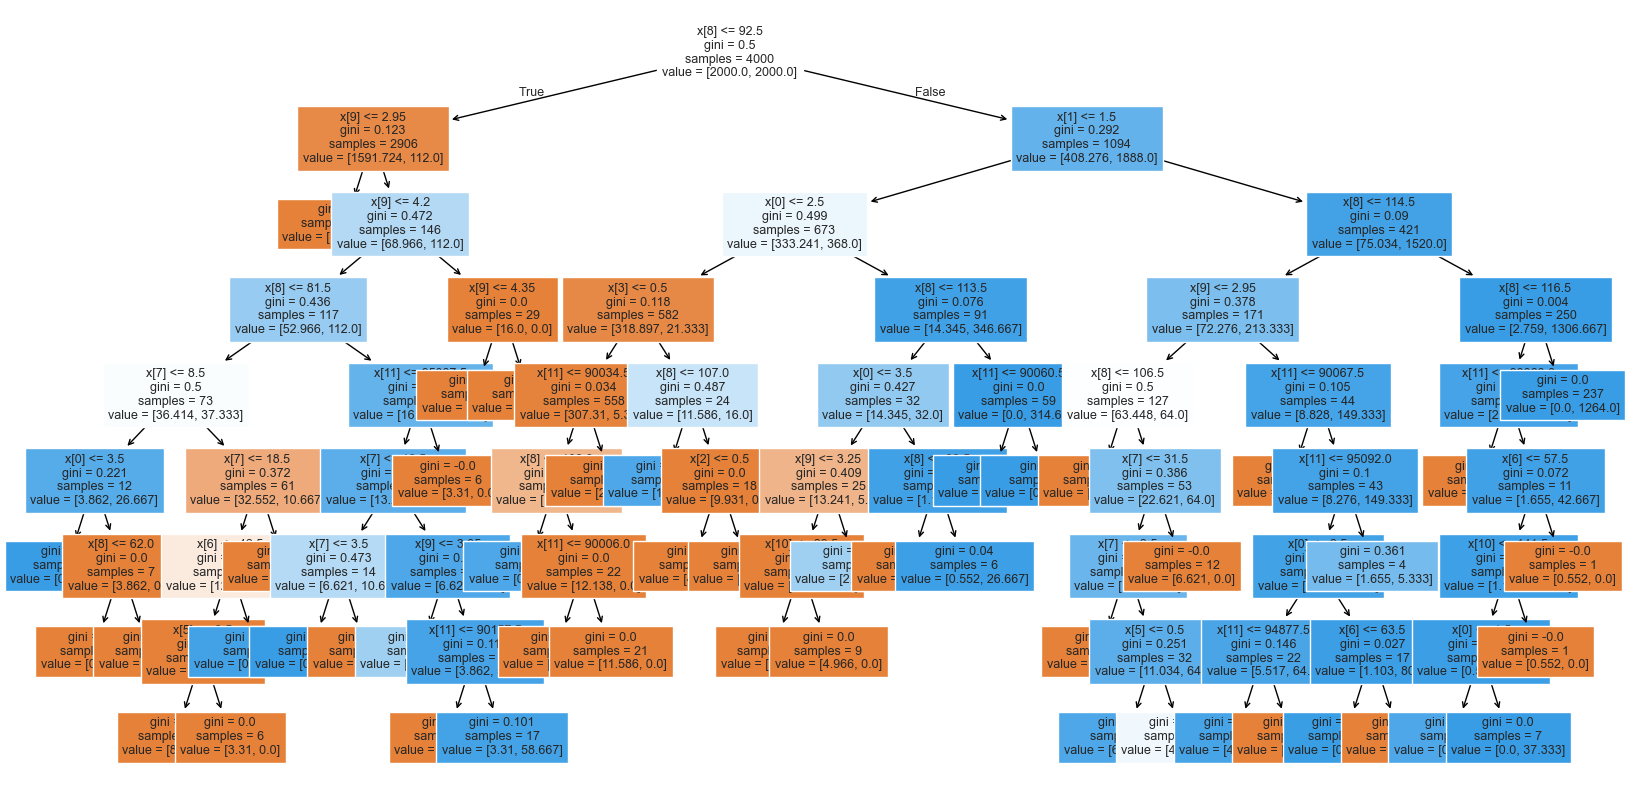

In [222]:
# Model2 Tree View
plot_decision_tree(model2)

In [223]:
#### Optimizing for accuracy score
print("Model3 optimizing for accuracy score")
max_max_depth_values = 10
min_max_depth_values = 2
max_min_samples_split_values = 10
min_max_samples_split_values = 2
best_estimator = None
best_max_depth = None
best_min_samples_split = None
best_score_diff = float("inf")
model3 = None
for max_depth in range(min_max_depth_values, max_max_depth_values):
    for min_samples_split in range(min_max_samples_split_values, max_min_samples_split_values):
        estimator = DecisionTreeClassifier(
            max_depth = max_depth,
            min_samples_split = min_samples_split,
            class_weight = 'balanced',
            random_state = RANDOM_STATE,
        )
        estimator.fit(x_train, y_train)
        score = model_performance_using_sklearn(estimator, x_train, y_train, x_test, y_test, scoring_method = accuracy_score, silent=True)
        if score < best_score_diff:
            model3 = estimator
            best_score_diff = score
            best_max_depth = max_depth
            best_min_samples_split = min_samples_split


print("Best model depth:", best_max_depth)
print("Best model min sample split:", best_min_samples_split)
score3_df = model_performance_df(model3, x_train, y_train, x_test, y_test)
(score3_df * 100).round(2)




Model3 optimizing for accuracy score
Best model depth: 3
Best model min sample split: 2


,accuracy,precision,recall,f1
Training,93.45,58.98,98.93,73.9
Testing,93.20,61.08,97.14,75.0
Delta,0.25,2.10,1.79,1.1


#### Observations
- Model3 has a precision value of 61% and a recall value of 97%
- Model3 has a high recall value but a low precision value.
- Model3 could potentially be useful in the advertising campaign but not for loan processing.

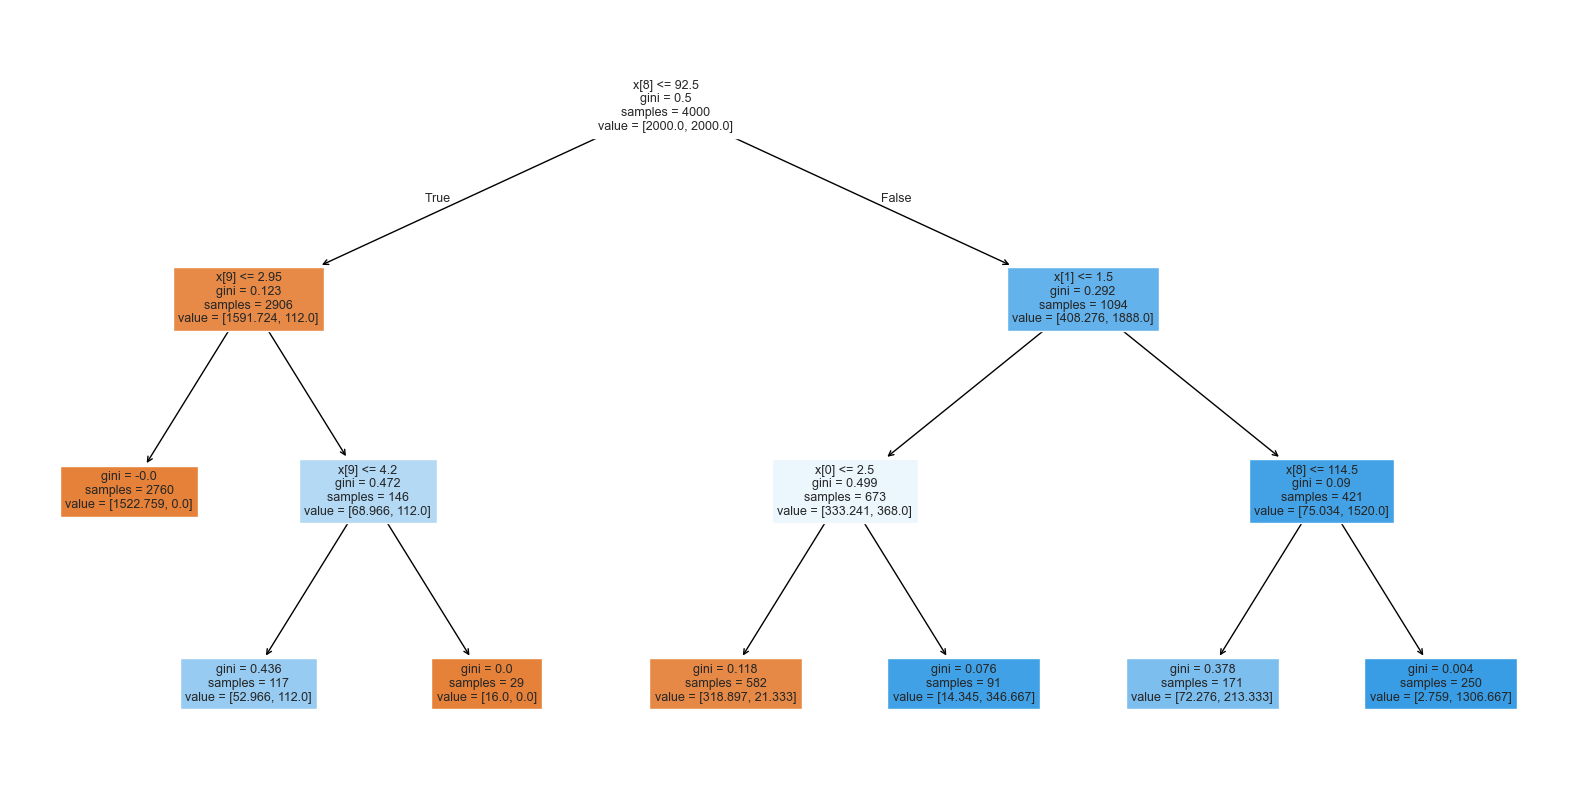

In [224]:
# Model3 Tree View
plot_decision_tree(model3)

## Model Performance Comparison and Final Model Selection

In [225]:
final_model_comparison(model1, model2, model3, x_test, y_test).round(2)


,accuracy,precision,recall,f1score
Model 1,0.99,0.95,0.91,0.93
Model 2,0.98,0.87,0.91,0.89
Model 3,0.93,0.61,0.97,0.75


#### Observations
- Model 1 has the highest accuracy, and precision values
- Model 3 has the highest recall values



### Final Model Selection

#### Conclusion
- Since Model 1 has a precision score of 95% it would be the best model to use to assist with loan processing.
- Since Model 3 has the highest recall scores it would be the best model for targeted advertising.


#### Advertising Campaign Model

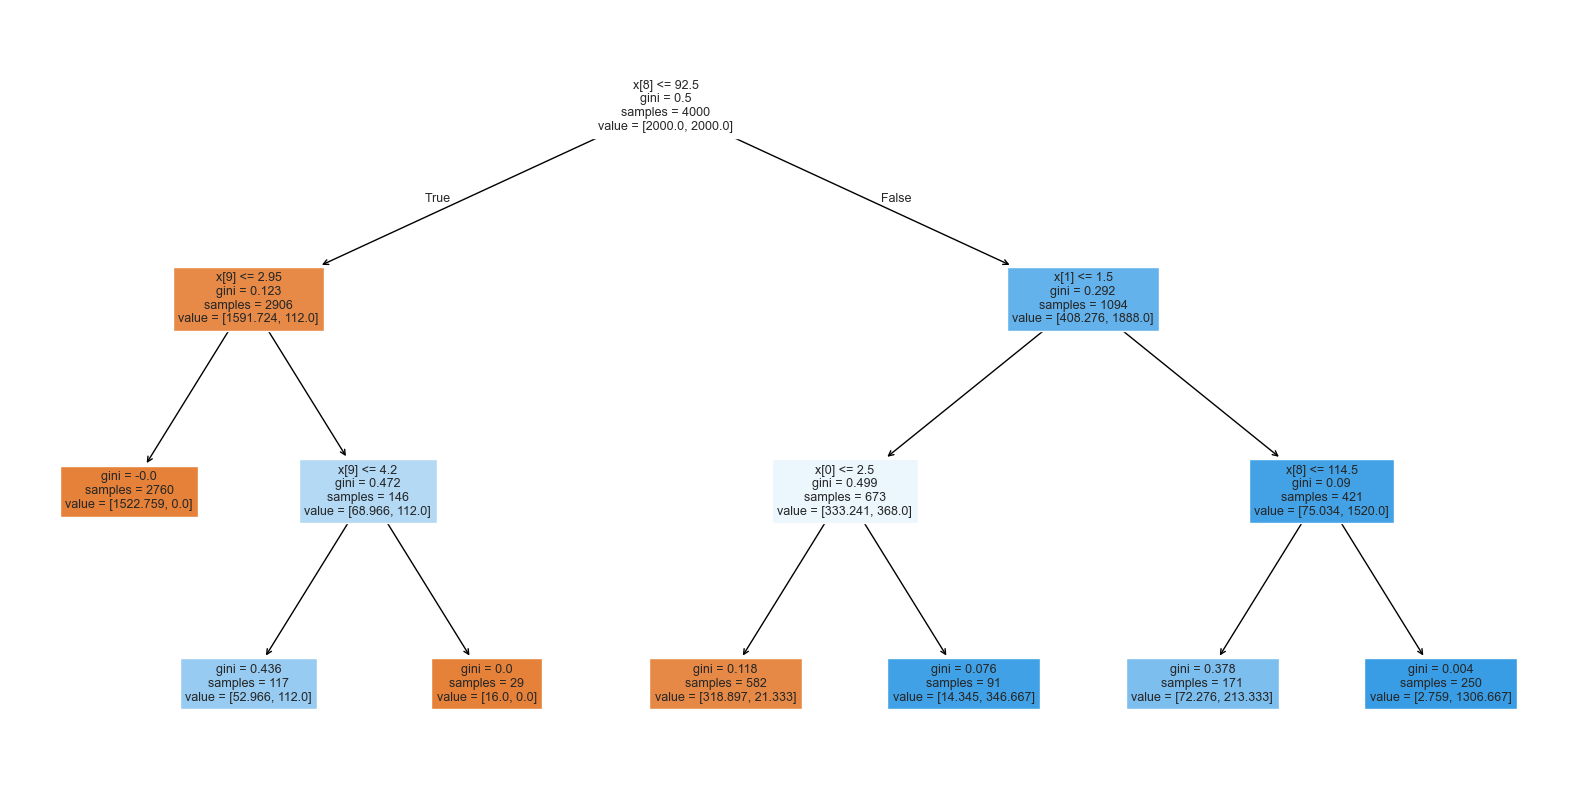

In [226]:
# Advertising Campaign Model
plot_decision_tree(model3)

## Actionable Insights and Business Recommendations


#### Marketing Campaign Suggestions
- I think the bank should create a marketing campaign that send out loan offers to the individuals flagged by model 3.
#### Additional Thoughts
- With more data model 1 could potentially be used for loan approvals but final decisions on loan approvals should still be left to individuals.

___